# Starling Task behavioral data analysis
this version is <b>not correct</b> because it does not consider the fact that sometimes block 2 is high and block 3 is low and sometimes it's vice versa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. task data summary

this is <b>Nill's </b> data

In [2]:
file_path = 'data/task_data_11_11_2024_16_46_44.xlsx'
df = pd.read_excel(file_path)
df.head(10)

,arrowRT,distribution,interTrialInterval,outcome,myCard,yourCard,spaceRT,totalReward,trialIndex,trialType,choice,block,timeoutRepeat
0,1067,uniform,894,win,3,9,4575,10.5,0,response,arrowdown,1,0
1,237,uniform,925,lose,2,1,1903,10.0,1,response,arrowdown,1,0
2,231,uniform,973,win,8,2,2130,10.5,2,response,arrowup,1,0
3,602,uniform,768,win,7,2,1537,11.0,3,response,arrowup,1,0
4,273,uniform,937,win,9,8,1809,11.5,4,response,arrowup,1,0
5,384,uniform,790,win,9,5,1447,12.0,5,response,arrowup,1,0
6,431,uniform,803,win,6,1,1320,12.5,6,response,arrowup,1,0
7,318,uniform,995,win,6,4,1317,13.0,7,response,arrowup,1,0
8,454,uniform,789,lose,5,7,1398,12.5,8,response,arrowup,1,0
9,166,uniform,885,win,1,4,2187,13.0,9,response,arrowdown,1,0


## 2. accuracy

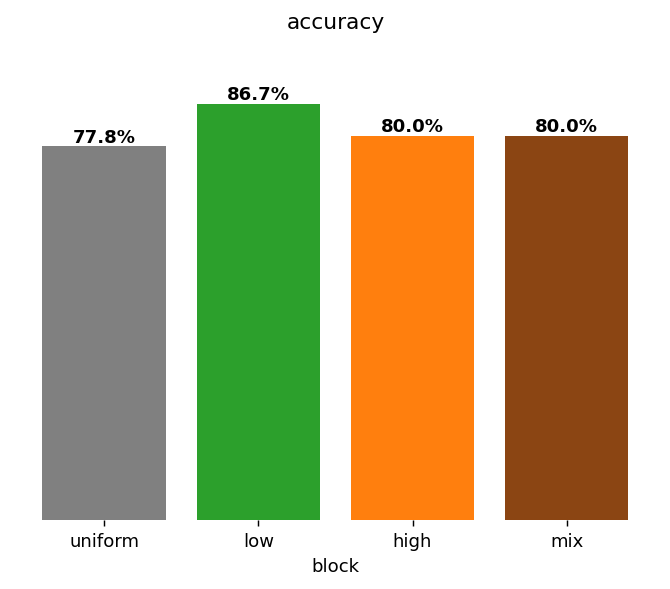

In [3]:
df['is_win'] = df['outcome'].apply(lambda x: 1 if x == 'win' else 0)

total_trials = df.groupby('block').size().reset_index(name='total_trials')
wins_per_block = df.groupby('block')['is_win'].sum().reset_index(name='wins')
win_rate_df = pd.merge(total_trials, wins_per_block, on='block')
win_rate_df['win_rate'] = win_rate_df['wins'] / win_rate_df['total_trials']



distribution_labels = {1: 'uniform',
                       2: df[df['block'] == 2]['distribution'].iloc[0],
                       3: df[df['block'] == 3]['distribution'].iloc[0],
                       4: 'mix'}

fig, ax = plt.subplots(dpi=130)

colors = ['#808080',  '#2ca02c', '#ff7f0e','#8B4513']  # Gray, Orange, Green, Red
bars = ax.bar(win_rate_df['block'], win_rate_df['win_rate'], color=colors)

ax.grid(False)
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.1%}', 
        ha='center', va='bottom', fontsize=10, color='black', weight='bold'
    )

ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
ax.set_xticklabels([distribution_labels[block] for block in win_rate_df['block']])

ax.yaxis.set_ticks_position('none')
ax.set_yticks([])
ax.set_ylabel('')

plt.xlabel('block')
plt.title('accuracy')
plt.ylim(0, 1)

plt.show()


## 3. mean RT for pressing space for flipping card

### results explanation:
1000 ms is added to the space RT for each trial. because the instruction message is shown after 1 second and the space pressing RT is calculated based on that. 

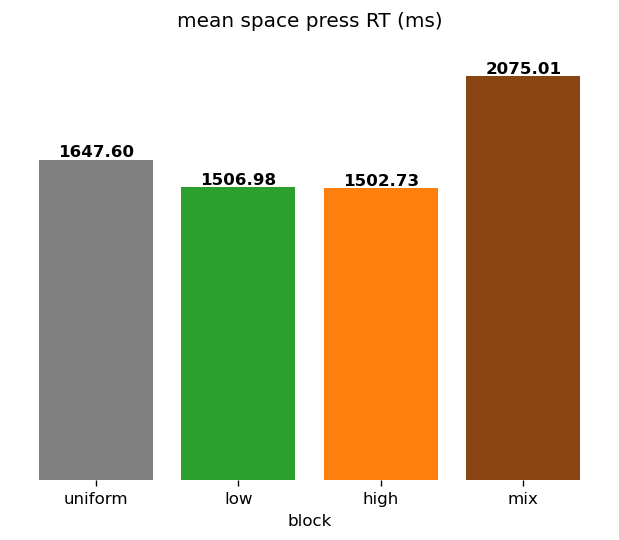

In [4]:
space_rt_means = df.groupby('block')['spaceRT'].mean()

colors = ['#808080','#2ca02c', '#ff7f0e',  '#8B4513']  # Gray, Orange, Green, Red

fig, ax = plt.subplots(dpi=120)

bars = ax.bar(win_rate_df['block'], space_rt_means, color=colors)

ax.grid(False)
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10, color='black', weight='bold'
    )

ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
ax.set_xticklabels([distribution_labels[block] for block in win_rate_df['block']])

ax.yaxis.set_ticks_position('none')
ax.set_yticks([])
ax.set_ylabel('')

plt.xlabel('block')
plt.title('mean space press RT (ms)')
plt.ylim(0, space_rt_means.max() * 1.1)

plt.show()


## 4.  mean RT for pressing up arrow or down arrow for guessing my card

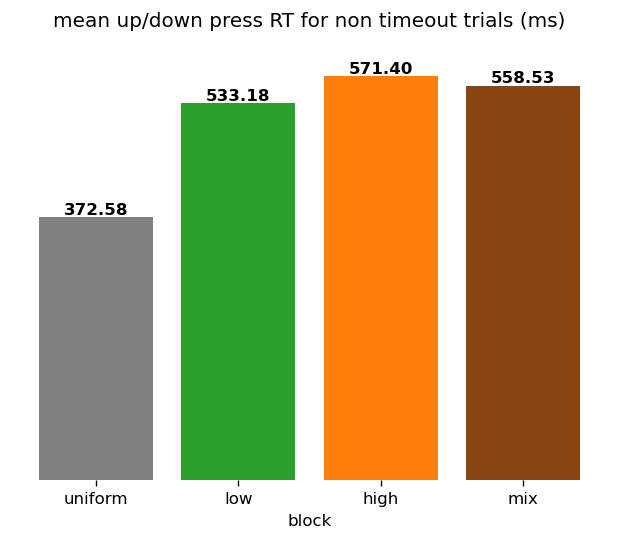

In [5]:
df['arrowRT'] = pd.to_numeric(df['arrowRT'], errors='coerce')

arrow_rt_means = df.groupby('block')['arrowRT'].mean()

colors = ['#808080', '#2ca02c', '#ff7f0e', '#8B4513']

fig, ax = plt.subplots(dpi=120)

bars = ax.bar(win_rate_df['block'], arrow_rt_means, color=colors)

ax.grid(False)
for spine in ['left', 'bottom', 'top', 'right']:
    ax.spines[spine].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
        ha='center', va='bottom', fontsize=10, color='black', weight='bold'
    )

ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
ax.set_xticklabels([distribution_labels[block] for block in win_rate_df['block']])

ax.yaxis.set_ticks_position('none')
ax.set_yticks([])
ax.set_ylabel('')

plt.xlabel('block')
plt.title('mean up/down press RT for non timeout trials (ms)')
plt.ylim(0, arrow_rt_means.max() * 1.1)

plt.show()


## 5. Now looking at mean arrowRT for each number in each distribution

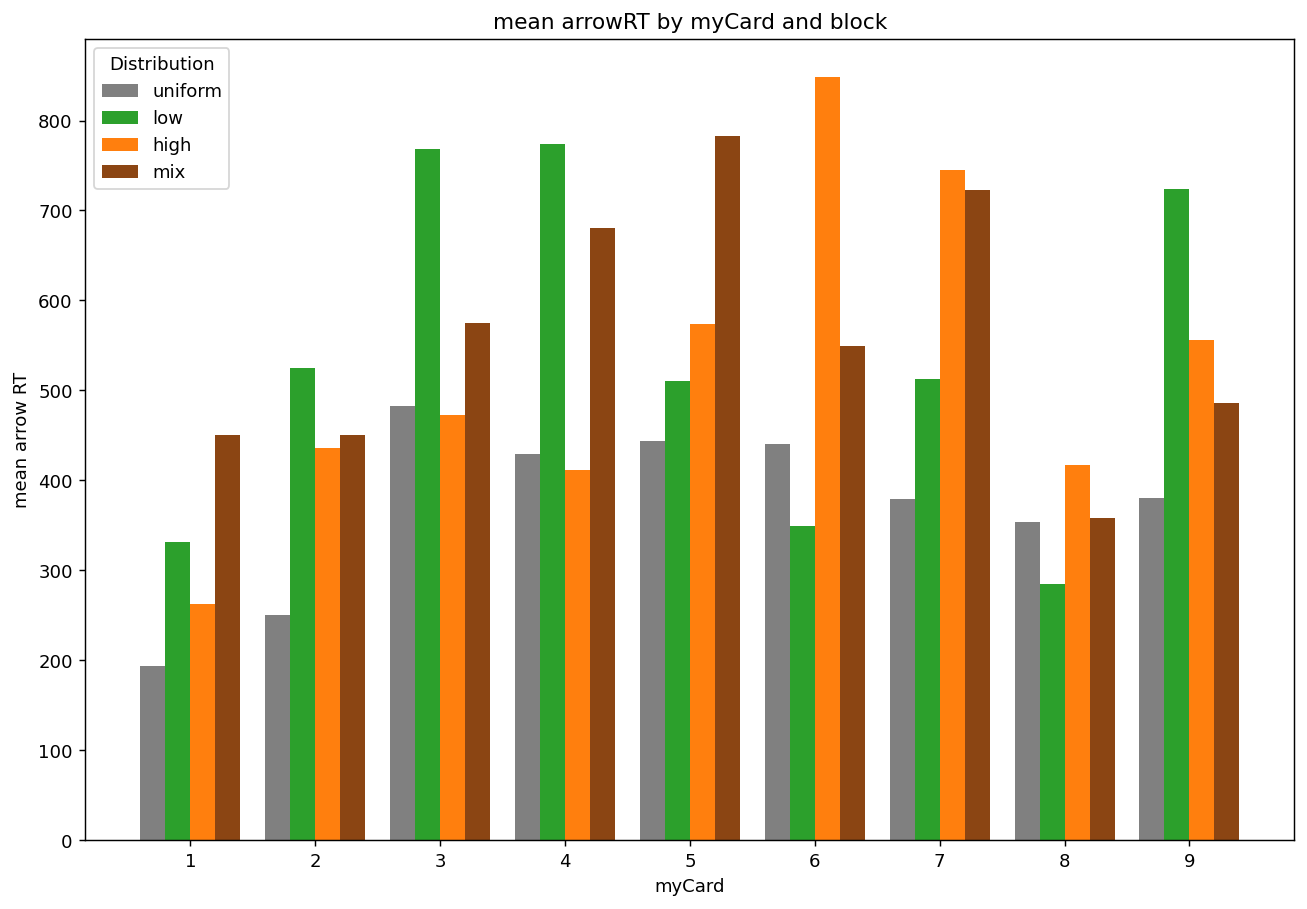

In [6]:
df['arrowRT'] = pd.to_numeric(df['arrowRT'], errors='coerce')

arrow_rt_means = df.groupby(['myCard', 'block'])['arrowRT'].mean().unstack()

colors = ['#808080', '#2ca02c', '#ff7f0e', '#8B4513']

distribution_labels = {1: df[df['block'] == 1]['distribution'].iloc[0],
                       2: df[df['block'] == 2]['distribution'].iloc[0],
                       3: df[df['block'] == 3]['distribution'].iloc[0],
                       4: 'mix'}

fig, ax = plt.subplots(dpi=130, figsize=(12, 8))

for i, block in enumerate(arrow_rt_means.columns):
    ax.bar(
        arrow_rt_means.index + i * 0.2, 
        arrow_rt_means[block], 
        width=0.2, 
        label=distribution_labels[block], 
        color=colors[i]
    )

ax.set_xticks(arrow_rt_means.index + 0.3)
ax.set_xticklabels(arrow_rt_means.index.astype(int))

ax.set_xlabel('myCard')
ax.set_ylabel('mean arrow RT')
ax.set_title('mean arrowRT by myCard and block')
ax.legend(title='Distribution')

plt.show()
